In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

In [5]:
df = pd.read_csv('bioactivity_hepg2_data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22052 entries, 0 to 22051
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   molecule_id  22052 non-null  object 
 1   smiles       22052 non-null  object 
 2   bioactivity  22052 non-null  object 
 3   pic50        22052 non-null  float64
dtypes: float64(1), object(3)
memory usage: 689.3+ KB


Lipinski foi um cientista que realizou uma série de experimentos utilizando uma grande quantidade de medicamentos ingeridos de forma oral. Ele sugeriu que para algum composto possua atividade farmacológica, deve-se enquadrar em algumas das suas cinco regras. As leis de farmacocinética de lipinski estão relacionadas a absorção, distribuição, metabolismo e excreção ( mais informações acesse: https://dev.drugbank.com/guides/terms/lipinski-s-rule-of-five). Desta forma, é importante obter propriedades extras das moléculas obtidas na etapa anterior, e verificar se as regras de Lipinski se enquadram nas mesmas.

A função abaixo extrai os smiles do dataframe e retorna a massa molecular, LogP e os números de doação e aceptação de hidrogenio.

In [6]:
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df['smiles'])
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,483.260,0.6813,1.0,6.0
1,675.539,6.7974,1.0,10.0
2,447.251,4.2209,3.0,4.0
3,484.650,7.8710,0.0,5.0
4,484.650,7.8710,0.0,5.0


In [8]:
df_combined = pd.concat([df,df_lipinski],axis=1)
df_combined.head()

,molecule_id,smiles,bioactivity,pic50,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,1.000000,483.260,0.6813,1.0,6.0
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,1.000000,675.539,6.7974,1.0,10.0
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,intermediate,-0.000000,447.251,4.2209,3.0,4.0
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,intermediate,-0.322219,484.650,7.8710,0.0,5.0
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,active,0.267606,484.650,7.8710,0.0,5.0


In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22052 entries, 0 to 22051
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   molecule_id    22052 non-null  object 
 1   smiles         22052 non-null  object 
 2   bioactivity    22052 non-null  object 
 3   pic50          22052 non-null  float64
 4   MW             22052 non-null  float64
 5   LogP           22052 non-null  float64
 6   NumHDonors     22052 non-null  float64
 7   NumHAcceptors  22052 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [10]:
selection = ['molecule_id','smiles','bioactivity','MW','LogP','NumHDonors','NumHAcceptors','pic50']
df_1 = df_combined[selection]
df_1.head()

,molecule_id,smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pic50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,483.260,0.6813,1.0,6.0,1.000000
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,675.539,6.7974,1.0,10.0,1.000000
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,intermediate,447.251,4.2209,3.0,4.0,-0.000000
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,intermediate,484.650,7.8710,0.0,5.0,-0.322219
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,active,484.650,7.8710,0.0,5.0,0.267606


**Análise de dados exploratória via "Lipinski descriptors".**

In [11]:
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

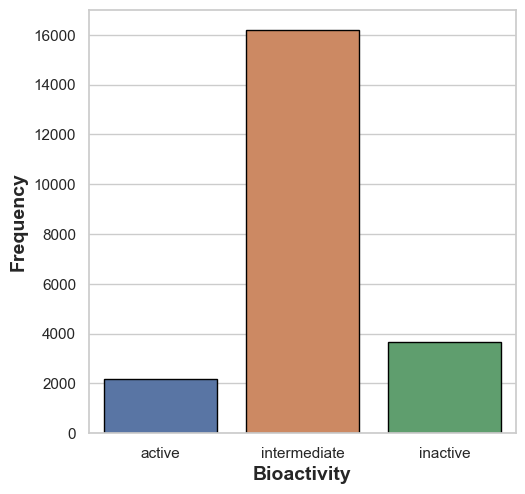

In [12]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity', data=df_1, edgecolor='black')

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity.png')

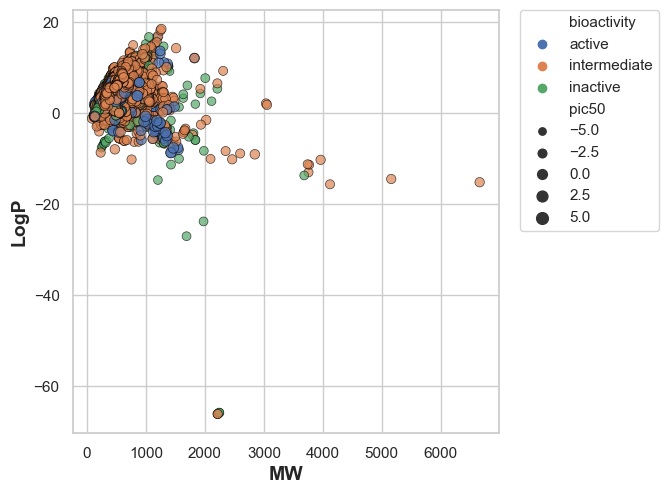

In [13]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_1, hue='bioactivity', size='pic50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

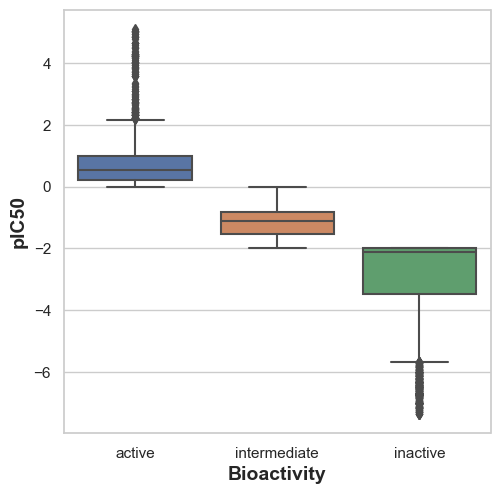

In [14]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'pic50', data = df_1)

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.png')

As linhas de código abaixo tentam provar se existe diferença significativa nos parâmetros de Lipinski entre a bioatividade dos compostos do dataframe, utilizou-se "mannwhitney u test" para testa-los.

In [15]:
df_2 = df_1[df_1['bioactivity']!='intermediate']

In [16]:
def mannwhitney_active_vs_inactive(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity']
  df = df_1[selection]
  active = df[df_1.bioactivity == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity']
  df = df_1[selection]
  inactive = df[df_1.bioactivity == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  print('Statistics=%.10f, p=%.10f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [17]:
mannwhitney_active_vs_inactive('pic50')

Statistics=8003328.0000000000, p=0.0000000000


,Descriptor,Statistics,p,alpha,Interpretation
0,pic50,8003328.0,0.0,0.05,Different distribution (reject H0)


MW

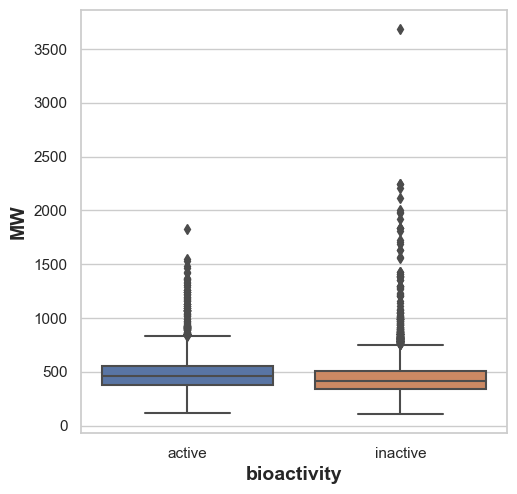

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'MW', data = df_2)

plt.xlabel('bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png')

In [19]:
mannwhitney_active_vs_inactive('MW')

Statistics=4731005.0000000000, p=0.0000000000


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4731005.0,1.784184e-31,0.05,Different distribution (reject H0)


LogP

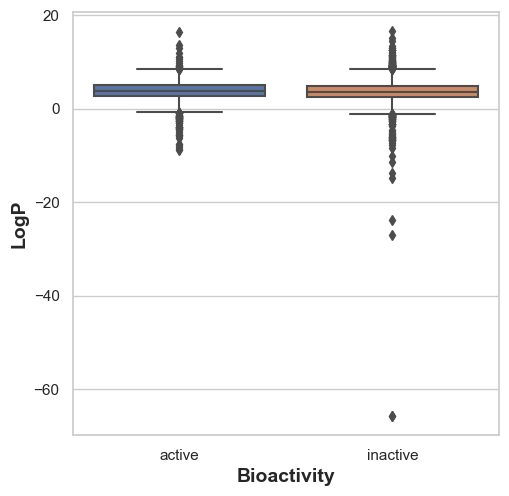

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'LogP', data = df_2)

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png')

In [21]:
mannwhitney_active_vs_inactive('LogP')

Statistics=4102174.0000000000, p=0.1077423872


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4102174.0,0.107742,0.05,Same distribution (fail to reject H0)


NumDonors

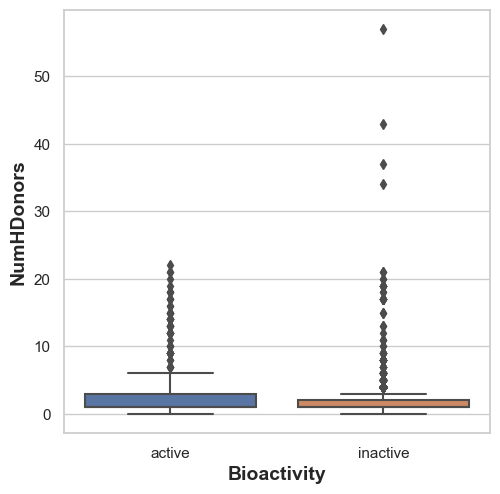

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'NumHDonors', data = df_2)

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.png')

In [27]:
mannwhitney_active_vs_inactive('NumHDonors')

Statistics=4093101.5000000000, p=0.1324814065


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4093101.5,0.132481,0.05,Same distribution (fail to reject H0)


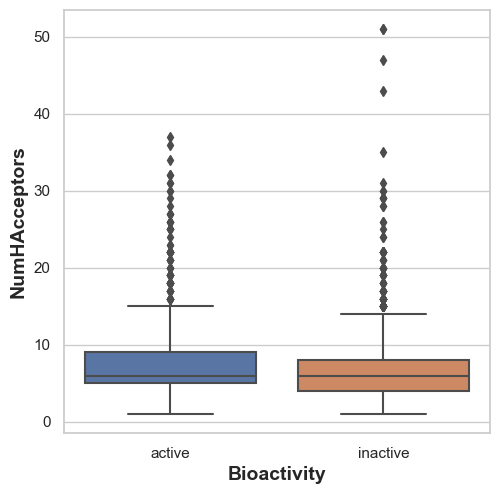

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'NumHAcceptors', data = df_2)

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.png')

In [28]:
mannwhitney_active_vs_inactive('NumHAcceptors')

Statistics=4752260.0000000000, p=0.0000000000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4752260.0,1.276622e-33,0.05,Different distribution (reject H0)


In [24]:
selection=['molecule_id','smiles','bioactivity','pic50']
df_1[selection].dropna().to_csv('hepg2_3class_pic50.csv', index=False)

Comprovou-se que existe diferença significativa com relação a massa molar e numero de aceptadores de hidrogênio (p valores de 1,78e(-31) e 1,27e(-33)).

A hipótese nula não pode ser rejeitada para LogP e número de doadores de hidrogênio (p valores 0,1 e 0,132), desta forma, concluíse que não há diferença significativa. 